# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [61]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [63]:
col_name = list(train)
print(col_name)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [64]:
for col in col_name:
    nb_unique = len(train[col].unique())
    print('Field {} has {} unique values'.format(col, nb_unique))

Field Id has 1460 unique values
Field MSSubClass has 15 unique values
Field MSZoning has 5 unique values
Field LotFrontage has 111 unique values
Field LotArea has 1073 unique values
Field Street has 2 unique values
Field Alley has 3 unique values
Field LotShape has 4 unique values
Field LandContour has 4 unique values
Field Utilities has 2 unique values
Field LotConfig has 5 unique values
Field LandSlope has 3 unique values
Field Neighborhood has 25 unique values
Field Condition1 has 9 unique values
Field Condition2 has 8 unique values
Field BldgType has 5 unique values
Field HouseStyle has 8 unique values
Field OverallQual has 10 unique values
Field OverallCond has 9 unique values
Field YearBuilt has 112 unique values
Field YearRemodAdd has 61 unique values
Field RoofStyle has 6 unique values
Field RoofMatl has 8 unique values
Field Exterior1st has 15 unique values
Field Exterior2nd has 16 unique values
Field MasVnrType has 5 unique values
Field MasVnrArea has 328 unique values
Field 

#### Drop the Id columns from both train and test as these are not needed for prediction

In [65]:
#TODO
train = train.drop(['Id'], axis=1)
train.head()
test = test.drop(['Id'], axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

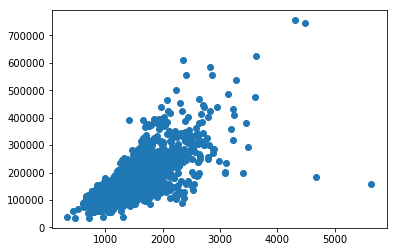

In [66]:
import matplotlib.pyplot as plt
x = train['GrLivArea']
y = train['SalePrice']

plt.scatter(x,y, label = 'test')

plt.show()


#### Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

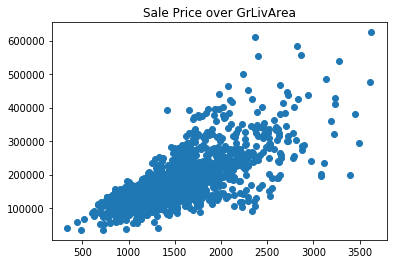

In [67]:
# Remove outliers for train['GrLivArea']>4000
#TODO
train = train[train['GrLivArea'] <= 4000] 
test = test[test['GrLivArea'] <= 4000]
x = train['GrLivArea']
y = train['SalePrice']
plt.scatter(x,y)
plt.title('Sale Price over GrLivArea')
plt.show()
#TODO: Scatter plot

#### Convert categorical variable into dummy variables using pandas get_dummies API


In [68]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


#### Impute missing data by the mean of each column.

In [69]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

348
330


In [70]:
#TODO
train = train.fillna(train.mean())
test = test.fillna(test.mean())
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [71]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


Generate train test split 70/30

In [72]:
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns == 'SalePrice'].values
y = train.loc[:, train.columns != 'SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#TODO

## Linear Regression

In [73]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt

#Fit a linear regression model to this data
model = LinearRegression()
model.fit(X_train, y_train)
#Compute the RMSE 
y_model = model.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_model))
print(RMSE)
score = model.score(X_train, y_train)
print(score)
#TODO

552.0365067748023
0.08080810401416008


### Standardizing the Predictors:

In [74]:
train.std()

MSSubClass                 42.358363
LotFrontage                20.902070
LotArea                  9860.763449
OverallQual                 1.369669
OverallCond                 1.113966
YearBuilt                  30.201590
YearRemodAdd               20.652143
MasVnrArea                176.850728
BsmtFinSF1                430.255052
BsmtFinSF2                161.522376
BsmtUnfSF                 442.197182
TotalBsmtSF               412.155715
1stFlrSF                  369.307331
2ndFlrSF                  431.528915
LowQualFinSF               48.688904
GrLivArea                 496.815378
BsmtFullBath                0.517420
BsmtHalfBath                0.237786
FullBath                    0.547683
HalfBath                    0.502533
BedroomAbvGr                0.815800
KitchenAbvGr                0.220627
TotRmsAbvGrd                1.611800
Fireplaces                  0.640359
GarageYrBlt                23.995572
GarageCars                  0.746215
GarageArea                211.986421
W

In [75]:
col_name = list(train)

In [76]:
train.columns.get_loc('SalePrice')

36

In [77]:
# Using scale function to Standardize the predictors
from sklearn.preprocessing import scale 
X_scale = scale(X, axis=0, with_mean=True, with_std=True, copy=True)


/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

## Lasso Regression

#### Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [79]:
# from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV, MultiTaskLassoCV
#TODO: fit a Lasso regression model to this data
alpha = 20
lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
lasso.fit(X_train, y_train)
y_model = model.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_model))
print(RMSE)
score = model.score(X_train, y_train)
print(score)
print(lasso.n_iter_)

#Compute the RMSE 
#TODO

491.7803453638484
-0.36408579436813115
[1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1000, 1000, 1, 1, 1, 1, 1, 1000, 1, 1, 1, 1, 1, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Cross Validation:

In [87]:
from sklearn.model_selection import cross_val_score
k = 10
alphas = [i for i in range(1,31,2)]
clf = MultiTaskLassoCV(cv = k, alphas=alphas)
scores = cross_val_score(clf, X_train, y_train, cv=k)
print(scores)
print(clf.alphas)


[0.0692033  0.05749238 0.05370103 0.06515425 0.32375485 0.03814367
 0.08910507 0.10513348 0.01690638 0.040581  ]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


AttributeError: 'MultiTaskLassoCV' object has no attribute 'alpha_'

#### How many columns has the model chosen?

In [81]:
coeff = lasso.coef_
coeff_non_zero = [x[0]  for x in coeff if x[0] != 0]
print(coeff_non_zero)
print('\nThe model has chosen {} columns over {}\n'.format(len(coeff_non_zero), len(coeff)))

col_name_X = [col for col in col_name if col != 'SalePrice']
# col_name_X.remove('SalePrice')

for name, coef in zip(col_name_X, coeff):
    if coef[0] != 0:
        print('{} {}'.format(name, coef[0]))
print('\n')


[3023.635758227008, 52.77981399422382, 156.9450401975132, 72.13751306114274, 246.08525115560036, 206.76425686395444, 92.49679555324494, 320.10073799916984, 110.26340259954247, 19.303285752869026, 2.645005040097673, -3.4950966468190585]

The model has chosen 12 columns over 287

LotArea 3023.635758227008
MasVnrArea 52.77981399422382
BsmtFinSF1 156.9450401975132
BsmtUnfSF 72.13751306114274
TotalBsmtSF 246.08525115560036
1stFlrSF 206.76425686395444
2ndFlrSF 92.49679555324494
GrLivArea 320.10073799916984
GarageArea 110.26340259954247
WoodDeckSF 19.303285752869026
OpenPorchSF 2.645005040097673
YrSold -3.4950966468190585




## Ridge Regression

#### Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). 

In [86]:
#TODO
model = Ridge(alpha = 0.1, normalize=True)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
score = model.score(X_train, y_train)
print(score)

0.0761986679575873


In [89]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=True)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
score = model.score(X_train, y_train)
print(score)

0.0761986679575874


#### What is your root mean squared error (RMSE)? Comment on your observation.

In [84]:
#Compute the RMSE 
RMSE = sqrt(mean_squared_error(y_test, y_model))
print(RMSE)

298.45716081628757


## Elastic Net Regression

#### Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [92]:
#TODO: fit the Elastic net regression model to this data
alphas = [0.01, 0.1, 20]

for alpha in alphas:
    model = ElasticNet(alpha=alpha)
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    score = model.score(X_train, y_train)
    print(score)
    RMSE = sqrt(mean_squared_error(y_test, y_model))
    print(RMSE)
#TODO: Compute the RMSE

0.0768315805235799
298.1338082259836
0.07664416286520263
295.4463903279363
0.012779591726429859
295.99714880715254
